In [4403]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import missingno as msno

In [4404]:
df_anim = pd.read_csv('csvfiles/animal.csv')
df_veg = pd.read_csv('csvfiles/vegetal.csv')
df_pop = pd.read_csv('csvfiles/population.csv')

In [4405]:
df_pop.shape

(356, 14)

In [4406]:
df_anim.shape

(30725, 14)

In [4407]:
df_veg.shape

(90576, 14)

In [4408]:
df_anim.columns

Index(['Domain Code', 'Domain', 'Area Code', 'Area', 'Element Code', 'Element',
       'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value', 'Flag',
       'Flag Description'],
      dtype='object')

In [4409]:
df_pop.columns

Index(['Domain Code', 'Domain', 'Area Code', 'Area', 'Element Code', 'Element',
       'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value', 'Flag',
       'Flag Description'],
      dtype='object')

In [4410]:
df_anim.shape

(30725, 14)

In [4411]:
df_veg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90576 entries, 0 to 90575
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       90576 non-null  object 
 1   Domain            90576 non-null  object 
 2   Area Code         90576 non-null  int64  
 3   Area              90576 non-null  object 
 4   Element Code      90576 non-null  int64  
 5   Element           90576 non-null  object 
 6   Item Code         90576 non-null  int64  
 7   Item              90576 non-null  object 
 8   Year Code         90576 non-null  int64  
 9   Year              90576 non-null  int64  
 10  Unit              90576 non-null  object 
 11  Value             90576 non-null  float64
 12  Flag              90576 non-null  object 
 13  Flag Description  90576 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 9.7+ MB


In [4412]:
df_pop.size

4984

La taille de la dataframe animal est de 430 150 elements. (rows * columns) <br>
Celle de la dataframe vegetal est de 1 268 064 elements. <br>
Et enfin la dataframe population contient 4984 elements. <br>

In [4413]:
df_anim.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,FBS,Food Balances (2010-),2,Afghanistan,645,Food supply quantity (kg/capita/yr),2731,Bovine Meat,2018,2018,kg,2.62,Fc,Calculated data
1,FBS,Food Balances (2010-),2,Afghanistan,645,Food supply quantity (kg/capita/yr),2731,Bovine Meat,2019,2019,kg,2.65,Fc,Calculated data
2,FBS,Food Balances (2010-),2,Afghanistan,664,Food supply (kcal/capita/day),2731,Bovine Meat,2018,2018,kcal/capita/day,15.00,Fc,Calculated data
3,FBS,Food Balances (2010-),2,Afghanistan,664,Food supply (kcal/capita/day),2731,Bovine Meat,2019,2019,kcal/capita/day,16.00,Fc,Calculated data
4,FBS,Food Balances (2010-),2,Afghanistan,674,Protein supply quantity (g/capita/day),2731,Bovine Meat,2018,2018,g/capita/day,1.09,Fc,Calculated data


In [4414]:
df_veg.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,FBS,Food Balances (2010-),2,Afghanistan,645,Food supply quantity (kg/capita/yr),2511,Wheat and products,2018,2018,kg,160.12,Fc,Calculated data
1,FBS,Food Balances (2010-),2,Afghanistan,645,Food supply quantity (kg/capita/yr),2511,Wheat and products,2019,2019,kg,161.93,Fc,Calculated data
2,FBS,Food Balances (2010-),2,Afghanistan,664,Food supply (kcal/capita/day),2511,Wheat and products,2018,2018,kcal/capita/day,1372.00,Fc,Calculated data
3,FBS,Food Balances (2010-),2,Afghanistan,664,Food supply (kcal/capita/day),2511,Wheat and products,2019,2019,kcal/capita/day,1387.00,Fc,Calculated data
4,FBS,Food Balances (2010-),2,Afghanistan,674,Protein supply quantity (g/capita/day),2511,Wheat and products,2018,2018,g/capita/day,37.00,Fc,Calculated data


In [4415]:
df_pop.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,FBS,Food Balances (2010-),2,Afghanistan,511,Total Population - Both sexes,2501,Population,2018,2018,1000 persons,37172,*,Unofficial figure
1,FBS,Food Balances (2010-),2,Afghanistan,511,Total Population - Both sexes,2501,Population,2019,2019,1000 persons,38042,*,Unofficial figure
2,FBS,Food Balances (2010-),3,Albania,511,Total Population - Both sexes,2501,Population,2018,2018,1000 persons,2883,*,Unofficial figure
3,FBS,Food Balances (2010-),3,Albania,511,Total Population - Both sexes,2501,Population,2019,2019,1000 persons,2881,*,Unofficial figure
4,FBS,Food Balances (2010-),4,Algeria,511,Total Population - Both sexes,2501,Population,2018,2018,1000 persons,42228,*,Unofficial figure


<h1>Nettoyage</h1>

In [4416]:
df_anim.insert(14,'type', 'animal_product', allow_duplicates=False)

In [4417]:
# df_veg['type'] = 'vegetal_product'

In [4418]:
df_anim.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,type
0,FBS,Food Balances (2010-),2,Afghanistan,645,Food supply quantity (kg/capita/yr),2731,Bovine Meat,2018,2018,kg,2.62,Fc,Calculated data,animal_product
1,FBS,Food Balances (2010-),2,Afghanistan,645,Food supply quantity (kg/capita/yr),2731,Bovine Meat,2019,2019,kg,2.65,Fc,Calculated data,animal_product
2,FBS,Food Balances (2010-),2,Afghanistan,664,Food supply (kcal/capita/day),2731,Bovine Meat,2018,2018,kcal/capita/day,15.00,Fc,Calculated data,animal_product
3,FBS,Food Balances (2010-),2,Afghanistan,664,Food supply (kcal/capita/day),2731,Bovine Meat,2019,2019,kcal/capita/day,16.00,Fc,Calculated data,animal_product
4,FBS,Food Balances (2010-),2,Afghanistan,674,Protein supply quantity (g/capita/day),2731,Bovine Meat,2018,2018,g/capita/day,1.09,Fc,Calculated data,animal_product


In [4419]:
df_veg.insert(14,'type', 'vegetal_product', allow_duplicates=False)

In [4420]:
df_veg.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,type
0,FBS,Food Balances (2010-),2,Afghanistan,645,Food supply quantity (kg/capita/yr),2511,Wheat and products,2018,2018,kg,160.12,Fc,Calculated data,vegetal_product
1,FBS,Food Balances (2010-),2,Afghanistan,645,Food supply quantity (kg/capita/yr),2511,Wheat and products,2019,2019,kg,161.93,Fc,Calculated data,vegetal_product
2,FBS,Food Balances (2010-),2,Afghanistan,664,Food supply (kcal/capita/day),2511,Wheat and products,2018,2018,kcal/capita/day,1372.00,Fc,Calculated data,vegetal_product
3,FBS,Food Balances (2010-),2,Afghanistan,664,Food supply (kcal/capita/day),2511,Wheat and products,2019,2019,kcal/capita/day,1387.00,Fc,Calculated data,vegetal_product
4,FBS,Food Balances (2010-),2,Afghanistan,674,Protein supply quantity (g/capita/day),2511,Wheat and products,2018,2018,g/capita/day,37.00,Fc,Calculated data,vegetal_product


In [4421]:
df_anim.size + df_veg.size

1819515

In [4422]:
product = pd.concat([df_anim, df_veg])
product.head(1)

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,type
0,FBS,Food Balances (2010-),2,Afghanistan,645,Food supply quantity (kg/capita/yr),2731,Bovine Meat,2018,2018,kg,2.62,Fc,Calculated data,animal_product


In [4423]:
product.tail(1)

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,type
90575,FBS,Food Balances (2010-),181,Zimbabwe,684,Fat supply quantity (g/capita/day),2899,Miscellaneous,2019,2019,g/capita/day,0.03,Fc,Calculated data,vegetal_product


In [4424]:
product.shape

(121301, 15)

In [4425]:
df_pop.columns

Index(['Domain Code', 'Domain', 'Area Code', 'Area', 'Element Code', 'Element',
       'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value', 'Flag',
       'Flag Description'],
      dtype='object')

In [4426]:
df_pop.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,FBS,Food Balances (2010-),2,Afghanistan,511,Total Population - Both sexes,2501,Population,2018,2018,1000 persons,37172,*,Unofficial figure
1,FBS,Food Balances (2010-),2,Afghanistan,511,Total Population - Both sexes,2501,Population,2019,2019,1000 persons,38042,*,Unofficial figure
2,FBS,Food Balances (2010-),3,Albania,511,Total Population - Both sexes,2501,Population,2018,2018,1000 persons,2883,*,Unofficial figure
3,FBS,Food Balances (2010-),3,Albania,511,Total Population - Both sexes,2501,Population,2019,2019,1000 persons,2881,*,Unofficial figure
4,FBS,Food Balances (2010-),4,Algeria,511,Total Population - Both sexes,2501,Population,2018,2018,1000 persons,42228,*,Unofficial figure


In [4427]:
df_pop = df_pop.drop(['Domain Code', 'Domain', 'Element Code', 'Element',
       'Item Code', 'Item', 'Unit', 'Flag',
       'Flag Description', 'Year Code'], axis=1)

In [4428]:
df_pop.head()

,Area Code,Area,Year,Value
0,2,Afghanistan,2018,37172
1,2,Afghanistan,2019,38042
2,3,Albania,2018,2883
3,3,Albania,2019,2881
4,4,Algeria,2018,42228


In [4429]:
# df_pop = df_pop.columns.str.replace(' ', '_') .str.lower

In [4430]:
product = product.rename(columns={'Area Code':'country_code','Area':'country', 'Year':'year','Value':'value', 'Domain Code':'domain_code', 'Domain':'domain', 'Element Code':'element_code', 'Element':'element', 'Item Code':'item_code', 'Item':'item', 'Year Code':'year_code', 'Unit':'unit', 'Flag':'flag', 'Flag Description':'flag_description'})

In [4431]:
df_pop = df_pop.rename(columns={'Area Code':'country_code', 'Area':'country', 'Year':'year', 'Value':'pop_1000_hab'})

In [4432]:
#df_pop.columns = ['countrys_code', 'countrys', 'year', 'pop_1000_hab']

In [4433]:
df = pd.merge(df_pop, product, on=['country_code','country','year'])

In [4434]:
df.head()

,country_code,country,year,pop_1000_hab,domain_code,domain,element_code,element,item_code,item,year_code,unit,value,flag,flag_description,type
0,2,Afghanistan,2018,37172,FBS,Food Balances (2010-),645,Food supply quantity (kg/capita/yr),2731,Bovine Meat,2018,kg,2.62,Fc,Calculated data,animal_product
1,2,Afghanistan,2018,37172,FBS,Food Balances (2010-),664,Food supply (kcal/capita/day),2731,Bovine Meat,2018,kcal/capita/day,15.00,Fc,Calculated data,animal_product
2,2,Afghanistan,2018,37172,FBS,Food Balances (2010-),674,Protein supply quantity (g/capita/day),2731,Bovine Meat,2018,g/capita/day,1.09,Fc,Calculated data,animal_product
3,2,Afghanistan,2018,37172,FBS,Food Balances (2010-),684,Fat supply quantity (g/capita/day),2731,Bovine Meat,2018,g/capita/day,1.20,Fc,Calculated data,animal_product
4,2,Afghanistan,2018,37172,FBS,Food Balances (2010-),645,Food supply quantity (kg/capita/yr),2732,Mutton & Goat Meat,2018,kg,4.26,Fc,Calculated data,animal_product


<AxesSubplot:>

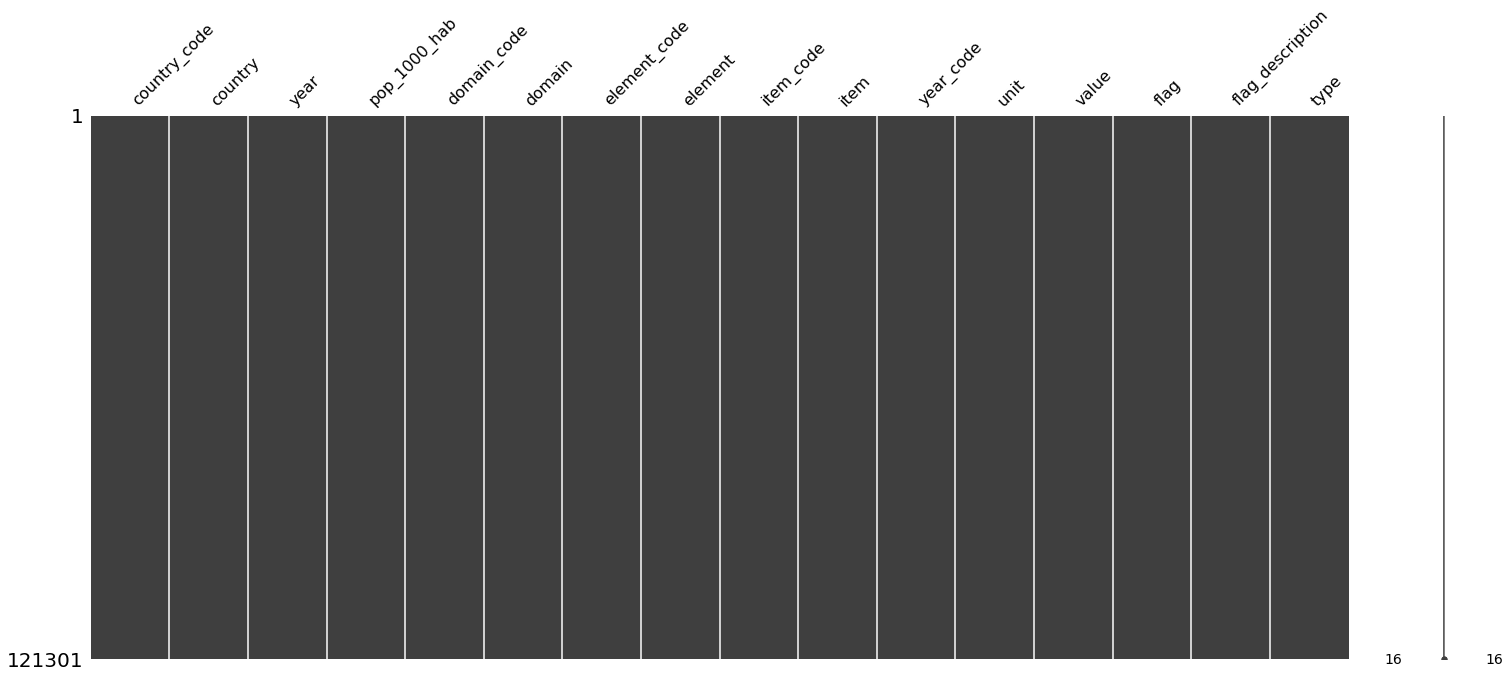

In [4435]:
msno.matrix(df)

In [4436]:
df.describe()

,country_code,year,pop_1000_hab,element_code,item_code,year_code,value
count,121301.000000,121301.000000,1.213010e+05,121301.000000,121301.000000,121301.000000,121301.000000
mean,126.798270,2018.499922,4.387762e+04,666.711519,2635.707645,2018.499922,10.952580
std,72.903359,0.500002,1.542962e+05,14.430364,92.020591,0.500002,56.045108
min,1.000000,2018.000000,5.200000e+01,645.000000,2511.000000,2018.000000,-0.030000
25%,66.000000,2018.000000,2.883000e+03,645.000000,2560.000000,2018.000000,0.000000
50%,122.000000,2018.000000,1.003600e+04,664.000000,2615.000000,2018.000000,0.150000
75%,189.000000,2019.000000,3.182500e+04,674.000000,2734.000000,2019.000000,2.900000
max,276.000000,2019.000000,1.433784e+06,684.000000,2899.000000,2019.000000,1787.000000


In [4437]:
df.dtypes

country_code          int64
country              object
year                  int64
pop_1000_hab          int64
domain_code          object
domain               object
element_code          int64
element              object
item_code             int64
item                 object
year_code             int64
unit                 object
value               float64
flag                 object
flag_description     object
type                 object
dtype: object

In [4438]:
print(df['country'].unique())

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia'
 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'Chile'
 'China, Hong Kong SAR' 'China, Macao SAR' 'China, mainland'
 'China, Taiwan Province of' 'Colombia' 'Comoros' 'Congo' 'Costa Rica'
 "C?te d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia' 'Eswatini'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'French Polynesia' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India'
 'Indonesia' '

In [4439]:
df.head()

,country_code,country,year,pop_1000_hab,domain_code,domain,element_code,element,item_code,item,year_code,unit,value,flag,flag_description,type
0,2,Afghanistan,2018,37172,FBS,Food Balances (2010-),645,Food supply quantity (kg/capita/yr),2731,Bovine Meat,2018,kg,2.62,Fc,Calculated data,animal_product
1,2,Afghanistan,2018,37172,FBS,Food Balances (2010-),664,Food supply (kcal/capita/day),2731,Bovine Meat,2018,kcal/capita/day,15.00,Fc,Calculated data,animal_product
2,2,Afghanistan,2018,37172,FBS,Food Balances (2010-),674,Protein supply quantity (g/capita/day),2731,Bovine Meat,2018,g/capita/day,1.09,Fc,Calculated data,animal_product
3,2,Afghanistan,2018,37172,FBS,Food Balances (2010-),684,Fat supply quantity (g/capita/day),2731,Bovine Meat,2018,g/capita/day,1.20,Fc,Calculated data,animal_product
4,2,Afghanistan,2018,37172,FBS,Food Balances (2010-),645,Food supply quantity (kg/capita/yr),2732,Mutton & Goat Meat,2018,kg,4.26,Fc,Calculated data,animal_product


In [4440]:
df.drop(['domain_code', 'domain', 'element_code', 'item_code', 'year_code', 'flag', 'flag_description', 'unit'], axis=1, inplace=True)


In [4441]:
df.head()

,country_code,country,year,pop_1000_hab,element,item,value,type
0,2,Afghanistan,2018,37172,Food supply quantity (kg/capita/yr),Bovine Meat,2.62,animal_product
1,2,Afghanistan,2018,37172,Food supply (kcal/capita/day),Bovine Meat,15.00,animal_product
2,2,Afghanistan,2018,37172,Protein supply quantity (g/capita/day),Bovine Meat,1.09,animal_product
3,2,Afghanistan,2018,37172,Fat supply quantity (g/capita/day),Bovine Meat,1.20,animal_product
4,2,Afghanistan,2018,37172,Food supply quantity (kg/capita/yr),Mutton & Goat Meat,4.26,animal_product


In [4442]:
df = pd.pivot_table(df, values='value', index=['country_code','country','year','pop_1000_hab','type', 'item'], columns='element')
df = df.reset_index()
df

element,country_code,country,year,pop_1000_hab,type,item,Fat supply quantity (g/capita/day),Food supply (kcal/capita/day),Food supply quantity (kg/capita/yr),Protein supply quantity (g/capita/day)
0,1,Armenia,2018,2952,animal_product,"Aquatic Animals, Others",0.00,0.0,0.00,0.00
1,1,Armenia,2018,2952,animal_product,Aquatic Plants,0.00,0.0,0.00,0.00
2,1,Armenia,2018,2952,animal_product,Bovine Meat,11.41,145.0,24.05,9.85
3,1,Armenia,2018,2952,animal_product,"Butter, Ghee",3.54,31.0,1.59,0.04
4,1,Armenia,2018,2952,animal_product,Cephalopods,0.00,0.0,0.01,0.00
...,...,...,...,...,...,...,...,...,...,...
30495,276,Sudan,2019,42813,vegetal_product,Tomatoes and products,0.10,9.0,15.36,0.41
30496,276,Sudan,2019,42813,vegetal_product,"Vegetables, other",0.14,20.0,27.51,0.90
30497,276,Sudan,2019,42813,vegetal_product,Wheat and products,1.67,535.0,61.56,16.00
30498,276,Sudan,2019,42813,vegetal_product,Wine,0.00,0.0,0.00,0.00


In [4443]:
mask_2018 = df['year'] == 2018
mask_2019 = df['year'] == 2019

In [4444]:
mask_france = df['country'] == 'France'
mask_wine = df['item'] == 'Wine'
df[mask_france & mask_wine]

C:\Users\Adrien\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


element,country_code,country,year,pop_1000_hab,type,item,Fat supply quantity (g/capita/day),Food supply (kcal/capita/day),Food supply quantity (kg/capita/yr),Protein supply quantity (g/capita/day)
8025,68,France,2018,66931,vegetal_product,Wine,0.0,74.0,39.38,0.0
8109,68,France,2019,65130,vegetal_product,Wine,0.0,75.0,40.36,0.0


<AxesSubplot:>

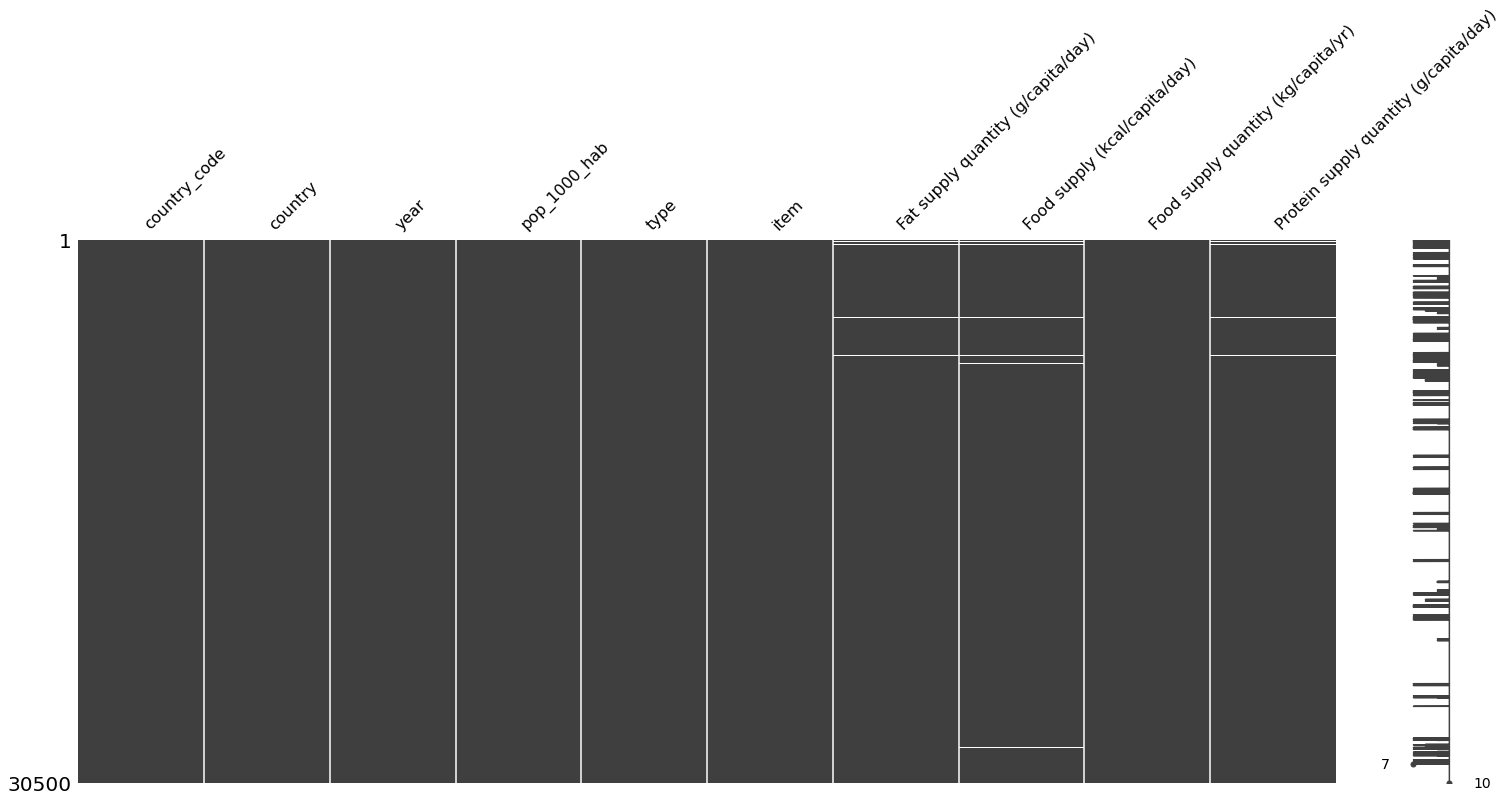

In [4445]:
msno.matrix(df)

In [4446]:
df_africa = pd.read_csv('csvfiles/Africa.csv')
df_africa = df_africa.assign(geozone = 'Africa')
df_america = pd.read_csv('csvfiles/America.csv')
df_america = df_america.assign(geozone = 'America')
df_asia = pd.read_csv('csvfiles/Asia.csv')
df_asia = df_asia.assign(geozone = 'Asia')
df_europe = pd.read_csv('csvfiles/Europe.csv')
df_europe = df_europe.assign(geozone = 'Europe')
df_oceania = pd.read_csv('csvfiles/Oceania.csv')
df_oceania = df_europe.assign(geozone = 'Oceania')

df_world = pd.concat([df_africa, df_america, df_asia, df_europe, df_oceania])
df_world.shape

(207, 15)

In [4447]:
df_least = pd.read_csv('csvfiles/dev_countries.csv')
df_least.head(1)

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,FBS,Food Balances (2010-),2,Afghanistan,511,Total Population - Both sexes,2501,Population,2019,2019,1000 persons,38042,*,Unofficial figure


In [4448]:
df['developed'] = True
df_least['developed'] = False

In [4449]:
df.head(1)

element,country_code,country,year,pop_1000_hab,type,item,Fat supply quantity (g/capita/day),Food supply (kcal/capita/day),Food supply quantity (kg/capita/yr),Protein supply quantity (g/capita/day),developed
0,1,Armenia,2018,2952,animal_product,"Aquatic Animals, Others",0.0,0.0,0.0,0.0,True


In [4450]:
df_least.head(1)

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,developed
0,FBS,Food Balances (2010-),2,Afghanistan,511,Total Population - Both sexes,2501,Population,2019,2019,1000 persons,38042,*,Unofficial figure,False


In [4451]:
df_least = df_least[['Area','developed']]
df_least.columns = ['country','developed']
df_least

,country,developed
0,Afghanistan,False
1,Angola,False
2,Antigua and Barbuda,False
3,Armenia,False
4,Azerbaijan,False
...,...,...
76,Uzbekistan,False
77,Vanuatu,False
78,Yemen,False
79,Zambia,False


In [4452]:
df.drop_duplicates(subset='country').country.isin(df_least.country)

0         True
166       True
325      False
491      False
662       True
         ...  
29660    False
29824    False
29982    False
30140    False
30315     True
Name: country, Length: 178, dtype: bool

In [4453]:
df_world.tail(1)

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,geozone
38,FBS,Food Balances (2010-),229,United Kingdom of Great Britain and Northern I...,511,Total Population - Both sexes,2501,Population,2019,2019,1000 persons,67530,*,Unofficial figure,Oceania


In [4454]:
df_world.reset_index()
df_world

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,geozone
0,FBS,Food Balances (2010-),4,Algeria,511,Total Population - Both sexes,2501,Population,2019,2019,1000 persons,43053,*,Unofficial figure,Africa
1,FBS,Food Balances (2010-),7,Angola,511,Total Population - Both sexes,2501,Population,2019,2019,1000 persons,31825,*,Unofficial figure,Africa
2,FBS,Food Balances (2010-),53,Benin,511,Total Population - Both sexes,2501,Population,2019,2019,1000 persons,11801,*,Unofficial figure,Africa
3,FBS,Food Balances (2010-),20,Botswana,511,Total Population - Both sexes,2501,Population,2019,2019,1000 persons,2304,*,Unofficial figure,Africa
4,FBS,Food Balances (2010-),233,Burkina Faso,511,Total Population - Both sexes,2501,Population,2019,2019,1000 persons,20321,*,Unofficial figure,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,FBS,Food Balances (2010-),203,Spain,511,Total Population - Both sexes,2501,Population,2019,2019,1000 persons,46737,*,Unofficial figure,Oceania
35,FBS,Food Balances (2010-),210,Sweden,511,Total Population - Both sexes,2501,Population,2019,2019,1000 persons,10036,*,Unofficial figure,Oceania
36,FBS,Food Balances (2010-),211,Switzerland,511,Total Population - Both sexes,2501,Population,2019,2019,1000 persons,8591,*,Unofficial figure,Oceania
37,FBS,Food Balances (2010-),230,Ukraine,511,Total Population - Both sexes,2501,Population,2019,2019,1000 persons,43994,*,Unofficial figure,Oceania


In [4460]:
df.head(1)

element,country_code,country,year,pop_1000_hab,type,item,Fat supply quantity (g/capita/day),Food supply (kcal/capita/day),Food supply quantity (kg/capita/yr),Protein supply quantity (g/capita/day),developed
0,1,Armenia,2018,2952,animal_product,"Aquatic Animals, Others",0.0,0.0,0.0,0.0,True


In [4476]:
df.sort_values(by='Protein supply quantity (g/capita/day)', ascending=False).drop_duplicates(subset='item')

element,country_code,country,year,pop_1000_hab,type,item,Fat supply quantity (g/capita/day),Food supply (kcal/capita/day),Food supply quantity (kg/capita/yr),Protein supply quantity (g/capita/day),developed
27065,222,Tunisia,2019,11695,vegetal_product,Wheat and products,5.77,1584.0,198.54,47.84,True
340,3,Albania,2018,2883,animal_product,Milk - Excluding Butter,39.39,632.0,316.95,36.71,True
14925,120,Lao People's Democratic Republic,2019,7169,vegetal_product,Rice (Milled Equivalent),6.49,1454.0,233.52,33.97,True
12403,105,Israel,2018,8382,animal_product,Poultry Meat,14.57,266.0,76.89,31.73,True
16206,130,Malawi,2018,18143,vegetal_product,Maize and products,12.66,1176.0,135.10,30.98,True
...,...,...,...,...,...,...,...,...,...,...,...
23506,195,Senegal,2018,15854,animal_product,"Fish, Body Oil",0.00,0.0,0.00,0.00,True
3641,33,Canada,2018,37075,animal_product,"Meat, Aquatic Mammals",0.00,0.0,0.00,0.00,True
23974,197,Sierra Leone,2019,7813,vegetal_product,Cottonseed,0.00,0.0,0.00,0.00,True
5254,46,Congo,2018,5244,vegetal_product,Palm kernels,1.00,16.0,0.00,0.00,True
